In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Transform SalePrice into discrete form
We split SalePrice in the training dataset into three pieces: < 25%, 25%-75%, >75%, and we labeled them low, medium, and high, respectively.

In [4]:
price_interquantile = pd.qcut(df_train['SalePrice'], [0, .25, .75, 1.], labels=['low', 'medium', 'high'])
price_interquantile

0       medium
1       medium
2         high
3       medium
4         high
         ...  
1455    medium
1456    medium
1457      high
1458    medium
1459    medium
Name: SalePrice, Length: 1460, dtype: category
Categories (3, object): [low < medium < high]

### Overview of Dataframe

In [5]:
train_interquantile = df_train.copy()
train_interquantile['Price'] = price_interquantile
train_interquantile = train_interquantile.drop('SalePrice', axis=1)
train_interquantile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,high
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,medium
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,medium
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,high
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,medium


In [6]:
train_interquantile.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_interquantile['Price'].describe()

count       1460
unique         3
top       medium
freq         733
Name: Price, dtype: object

In [8]:
train_interquantile["Price_num"] = train_interquantile["Price"].replace({"low":-1, "medium":0, "high":1})

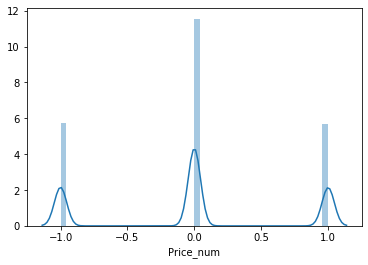

In [9]:
sns.distplot(train_interquantile['Price_num'])

In [10]:
train_interquantile['Price_num'].skew()

0.002890833790993233

In [11]:
train_interquantile['Price_num'].kurt()

-0.991013941070559

### Merge Train and Test
We merge Train and Test considering convenience for one-hot coding as it prevents confusing.

In [33]:
train = pd.read_csv("train.csv")

In [38]:
train_price_interquantile = pd.qcut(train['SalePrice'], [0, .25, .75, 1.], labels=['low', 'medium', 'high'])
train_price = train_price_interquantile
train['Price'] = train_price
train = train.drop('SalePrice', axis=1)

In [40]:
test = pd.read_csv("test.csv")
test_price = pd.read_csv("sample_submission.csv")

In [41]:
# cut test into three pieces based on the interquartile range of training set, which is 0, 129975, 214000, and 755000
test_price_interquantile = pd.cut(test_price['SalePrice'], [0, 129975, 214000, 755000], labels=['low', 'medium', 'high'])
test['Price'] = test_price_interquantile
all_data = pd.concat((train, test))  

In [43]:
# convert label to int for logistic regression
all_data["Price"] = train_interquantile["Price"].replace({"low":-1, "medium":0, "high":1})
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


### Missing value

In [44]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (100 * all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071


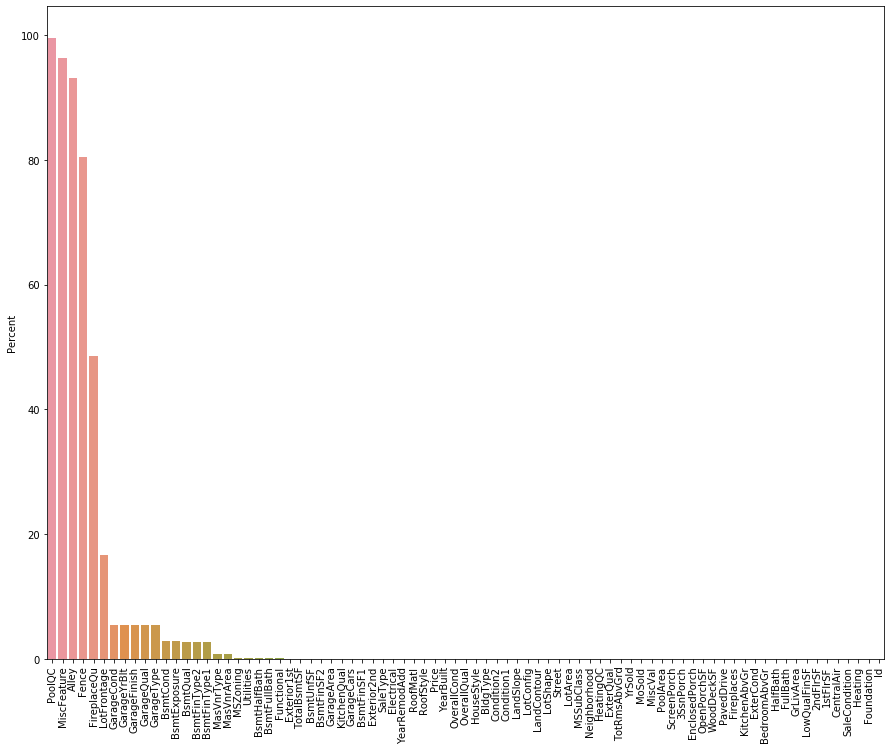

In [45]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])

## Model Training

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
data = all_data

In [48]:
data.drop('Id', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


In [49]:
# convert non-continuous int data to str
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

### Impute null value with mean

In [50]:
x = data.loc[:, data.columns!='Price']
mean_cols = x.mean()
x = x.fillna(mean_cols)

### One-hot Coding

In [51]:
x_dum = pd.get_dummies(x)

### Split Train and Test

In [60]:
train_x = x_dum[:1460]
test_x = x_dum[1460:]
train_y = train_price
test_y = test_price_interquantile

### Normalization

In [61]:
from sklearn.preprocessing import normalize

In [62]:
train_x = normalize(train_x, axis = 1)
test_x = normalize(test_x, axis = 1)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=1)

### Model Training

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# generate the results of confusion matrix and display
def confusion_matrix_report(y_pred, y_test):
    con_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_df = pd.DataFrame(con_matrix, ('high', 'low', 'medium'), ('high', 'low', 'medium'))
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
    bottom, top = heatmap.get_ylim()
    heatmap.set_ylim(bottom + 0.5, top - 0.5)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predict', fontsize=14)
    print(classification_report(y_test, y_pred))

#### Logistic Regression

In [81]:
# Create the logistic regression classifier
parameters = [{'penalty': ['l2'], 'C': [0.1, 1.0, 10.0]}]
logreg = LogisticRegression(penalty='l2', max_iter=200)
clf_lr = GridSearchCV(logreg, parameters, cv=5, verbose=0)

# train the classifier using the training data
clf_lr.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = clf_lr.predict(x_test)

0.7602739726027398
              precision    recall  f1-score   support

        high       0.85      0.73      0.79        63
         low       0.92      0.52      0.67        86
      medium       0.69      0.92      0.79       143

    accuracy                           0.76       292
   macro avg       0.82      0.72      0.75       292
weighted avg       0.79      0.76      0.75       292



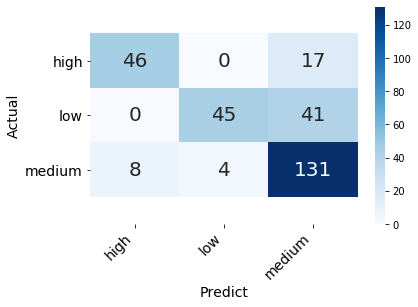

In [82]:
# Evaluate Prediciton of Logistic Regression

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### Naive Bayes

In [67]:
# Note: There is no hyperparameters to tune for NB
nb = BernoulliNB()

# train the classifier using the training data
nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = nb.predict(x_test)

0.7226027397260274
              precision    recall  f1-score   support

        high       0.66      0.86      0.74        63
         low       0.68      0.87      0.77        86
      medium       0.82      0.57      0.67       143

    accuracy                           0.72       292
   macro avg       0.72      0.77      0.73       292
weighted avg       0.74      0.72      0.72       292



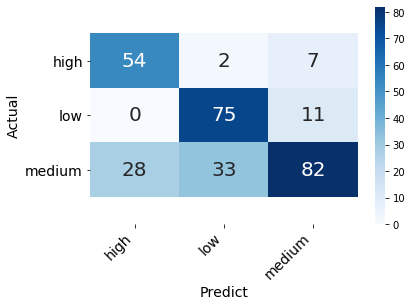

In [68]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### SVM

In [83]:
# create the support vector machine
parameters = {'kernel':['linear', 'poly'], 'C':[0.1, 1, 10]}
svm = SVC(probability=True)

clf_svm = GridSearchCV(svm, parameters, cv=5)
clf_svm.fit(x_train, y_train)

# predict the test set labels by 'y_pred'
y_pred = clf_svm.predict(x_test)

0.7876712328767124
              precision    recall  f1-score   support

        high       0.81      0.79      0.80        63
         low       0.89      0.64      0.74        86
      medium       0.74      0.87      0.80       143

    accuracy                           0.79       292
   macro avg       0.81      0.77      0.78       292
weighted avg       0.80      0.79      0.79       292



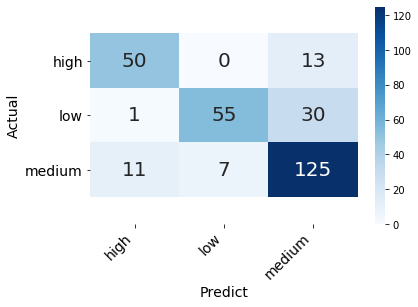

In [84]:
# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easiler to read
# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

### Cross_validation

#### Logistic Regression

In [85]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5)

cv_results = cross_val_score(clf_lr,
                             train_x,
                             train_y,
                             cv=kf,
                             scoring="accuracy")

In [86]:
cv_results

array([0.73972603, 0.76027397, 0.7260274 , 0.74315068, 0.68493151])

In [87]:
cv_results.mean()

0.7308219178082191

## Model Testing

#### Logistic Regression

In [73]:
result_lr = clf_lr.predict(test_x)
result_lr

array(['medium', 'medium', 'medium', ..., 'medium', 'low', 'medium'],
      dtype=object)

0.6922549691569568
              precision    recall  f1-score   support

        high       0.11      0.68      0.20        41
         low       0.00      0.00      0.00         0
      medium       0.99      0.69      0.81      1418

    accuracy                           0.69      1459
   macro avg       0.37      0.46      0.34      1459
weighted avg       0.96      0.69      0.80      1459



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


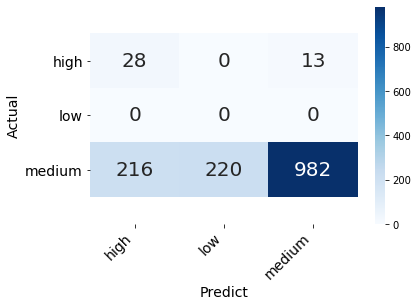

In [74]:
# Evaluate Prediciton of Logistic Regression

# Output the accuracy of our prediction
print(accuracy_score(test_y, result_lr))

# display the predicting based on confusion matrix
confusion_matrix_report(result_lr, test_y)

In [75]:
result_lr

array(['medium', 'medium', 'medium', ..., 'medium', 'low', 'medium'],
      dtype=object)

#### Naive Bayes

In [76]:
result_nb = nb.predict(test_x)

0.34955448937628514
              precision    recall  f1-score   support

        high       0.02      0.17      0.03        41
         low       0.00      0.00      0.00         0
      medium       0.97      0.35      0.52      1418

    accuracy                           0.35      1459
   macro avg       0.33      0.18      0.18      1459
weighted avg       0.94      0.35      0.51      1459



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


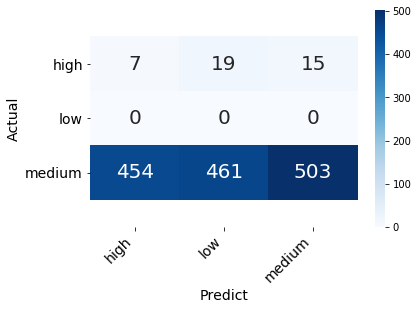

In [77]:
# Output the accuracy of our prediction
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)

#### SVM

In [89]:
result_svm = clf_svm.predict(test_x)

0.34955448937628514
              precision    recall  f1-score   support

        high       0.02      0.17      0.03        41
         low       0.00      0.00      0.00         0
      medium       0.97      0.35      0.52      1418

    accuracy                           0.35      1459
   macro avg       0.33      0.18      0.18      1459
weighted avg       0.94      0.35      0.51      1459



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


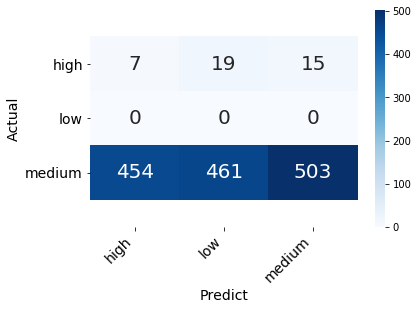

In [90]:
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)